<a href="https://colab.research.google.com/github/EyberRosero/Modelado-y-Simulacion-/blob/master/Tareas_Problemas_de_Valor_Inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problemas de Valor Inicial**

Encuentre una aproximación a $x_{(t)}$, dado:

$\dot x = f_{(t, x)}$


$x_{(t=0)} = x_0$

Módulos de librerias

In [ ]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

#### Función para método de Euler

In [ ]:
def euler( derivadas, h, tini, tfin, x0, params):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x 

#### Función para método Ruggen-Kutta

In [ ]:
def rk4( func, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = func( ti,xi,params)
      k2 = func( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = func( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = func( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## Lineal

Dada la ecuación diferencial:

\begin{equation}
 \dot{x}=a\cdot x
\end{equation} 

Siendo $a \in \Re$ una constante cualquiera. A continuación se grafica la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

Inializacón del sistema

In [ ]:
def sistema_1(t,x,a):
    x_dot = x*a
    return x_dot

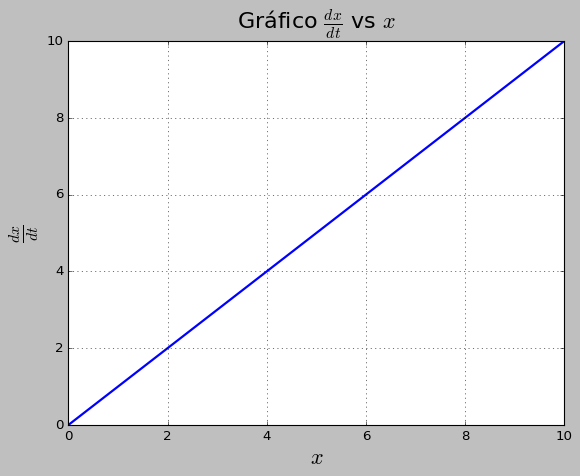

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = x*1
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=1
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 0.8

##Solución Analitica
x = x0*np.exp(a*t)

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_1, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, a)


Gráfica de compración de solucion analítica y método de aproximación de Euler

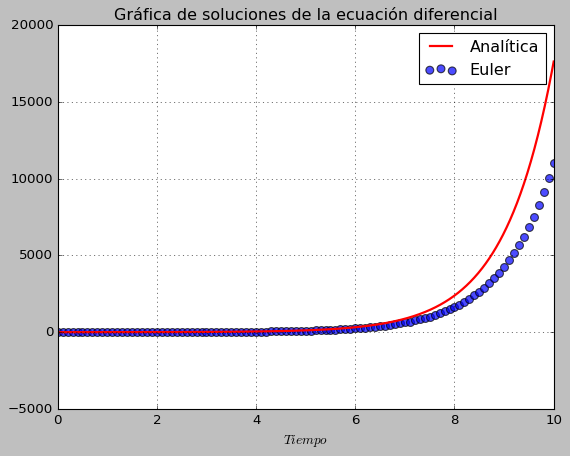

In [ ]:
plt.figure()
# gráfica de analítica:
plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1, label = 'Euler', s = 50, alpha=0.7)

plt.title('Gráfica de soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

Se varía el paso de integración  $h$  a fin de observar cómo varía la precisión de los resultados del método de Euler a medida que éste se hace más pequeño.

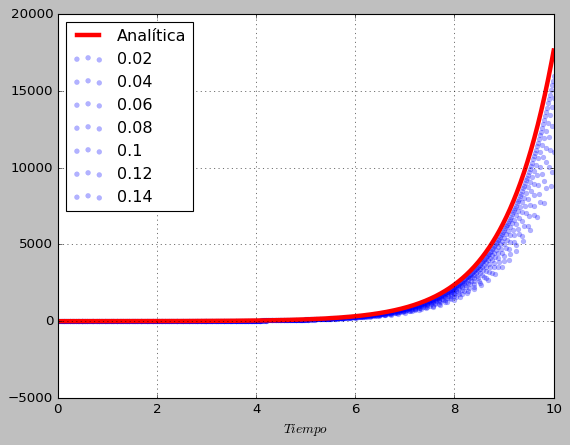

In [ ]:
h_i = np.arange(0,0.15,0.02)
for i in range(1,len(h_i)):
  t1,x1 = euler( sistema_1, h_i[i], tini, tfin, x0, a )
  plt.scatter( t1, x1, color='b', label=h_i[i], linewidth = 0.2, alpha=0.3)

plt.plot(  t, x, 'r', label = 'Analítica', linewidth = 4)
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

Gráfica de compración de solucion analítica y método de aproximación de Ruggen-kutta

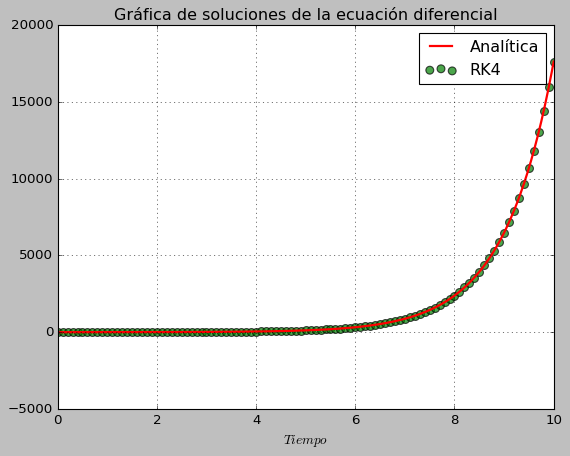

In [ ]:
plt.figure()
# gráfica de analítica:
plt.plot(  t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'g', label = 'RK4', s = 50,alpha=0.7)
plt.title('Gráfica de soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

Ahora se grafican las soluciones de la ecuacion diferencial variando ``x0``

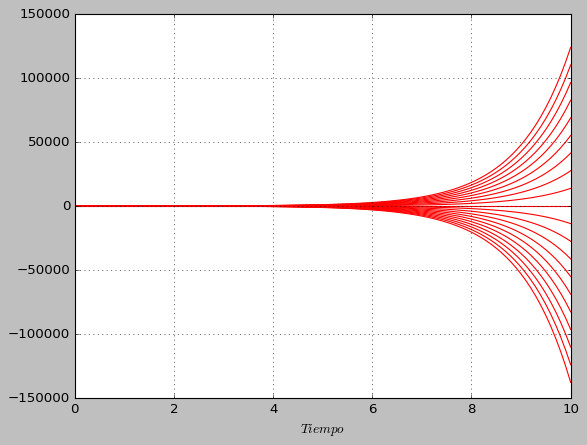

In [ ]:
for i in range(-10,10,1):
  t1,x1 = euler( sistema_1, h, tini, tfin, i, a )
  plt.plot( t1, x1,c='r')

plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.show()

## No Lineal

Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=a\cdot sin(x)
\end{equation} 

Siendo $a \in \Re$ una constante cualquiera. A continuación se grafica la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_2(t,x,a):
    x_dot = a*np.sin(x)
    return x_dot

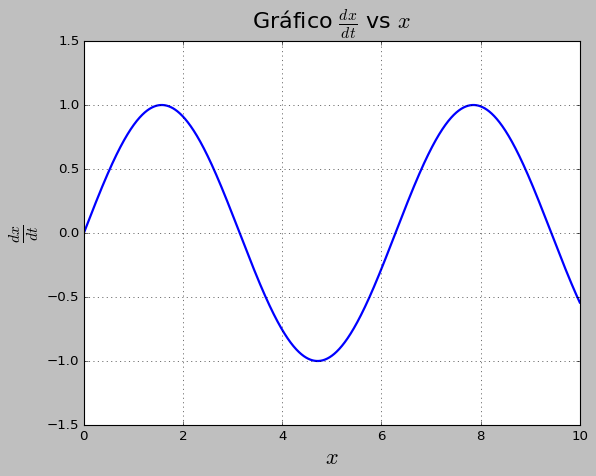

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = 1*np.sin(x)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=1
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 0.8

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_2, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_2, h, tini, tfin, x0, a)

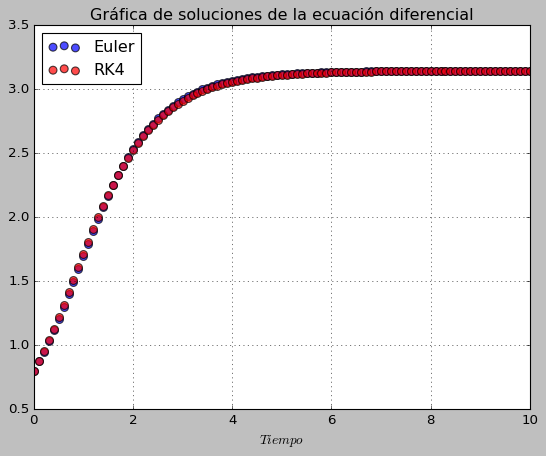

In [ ]:
plt.figure()
# gráfica de euler:
plt.scatter(t1, x1, label = 'Euler', s = 50, alpha=0.7)
plt.scatter( t2, x2, c = 'r', label = 'RK4', s = 50,alpha=0.7)
plt.title('Gráfica de soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

Soluciones de la ecuación diferencial variando ``x0``

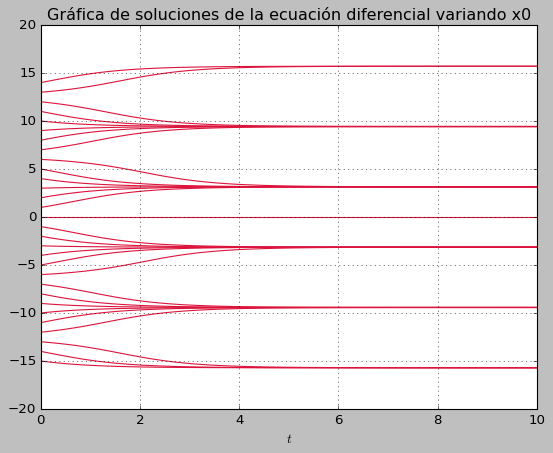

In [ ]:
plt.figure()

for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema_2, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'crimson')
plt.title('Gráfica de soluciones de la ecuación diferencial variando x0')
plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$t$')
plt.grid()
plt.show()

Se observa que tiene puntos estables para $x<0$ y $x>0$ pero en 0 es inestable

## Circuito RC Trasladado (Lineal)

Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=\frac{1}{RC}x
\end{equation} 

A continuación se grafican las aproximaciones numéricas de las soluciones de la ecuación diferencial obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_3(t,x,a):
    x_dot = -(1/a)*x
    return x_dot

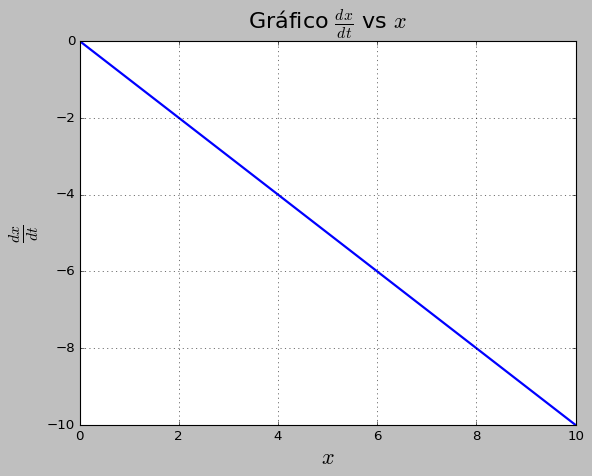

In [ ]:
x=np.arange(0, 10, 0.001)
dxdt = -x*(1/(1000*0.001))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
R = 1000
C = 0.001
a=R*C
t = np.linspace(0,10,1000) 
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 10
x0 = 1

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_3, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_3, h, tini, tfin, x0, a)

A continuación se grafica la comparación de los metodos de eproximación de Euler y Kutta para

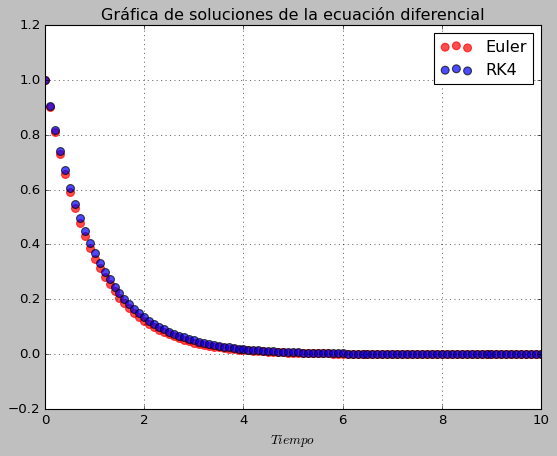

In [ ]:
plt.figure()
# gráfica de analítica:
#plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1,color='r', label = 'Euler', s = 50, alpha=0.7)
plt.scatter(t2, x2, label = 'RK4', s = 50, alpha=0.7)
plt.title('Gráfica de soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

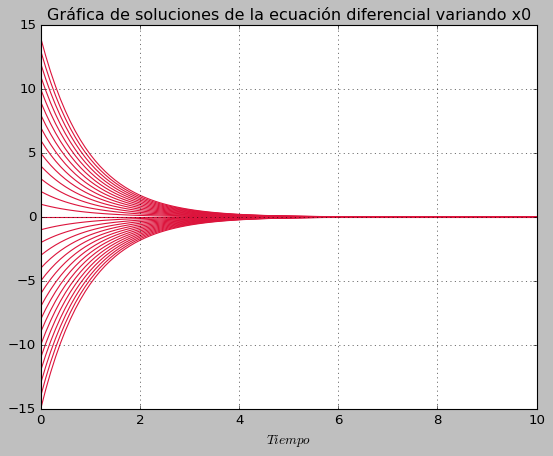

In [ ]:
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema_3, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'crimson')
plt.title('Gráfica de soluciones de la ecuación diferencial variando x0')
plt.xlim([0, tfin])
#plt.ylim([-3.14, 6.28])
plt.xlabel(r'$Tiempo$')
plt.grid()
#plt.legend(loc = 'best')
plt.show()

Se puede observar que tiene un unico punto fijo estable en 0

## Ecuación Logística (Crecimiento Poblacional)
Dada la ecuación diferencial:

\begin{equation}
  \dot{x}=R\cdot x (1-\frac{x}{K})
\end{equation} 

A continuación se grafican las aproximaciones numéricas obtenidas con el método de Euler y con el método Ruggen-kutta.

In [ ]:
def sistema_4(t,x,a):
  k= 100
  x_dot = (a*x)*(1-(x/k))
  return x_dot

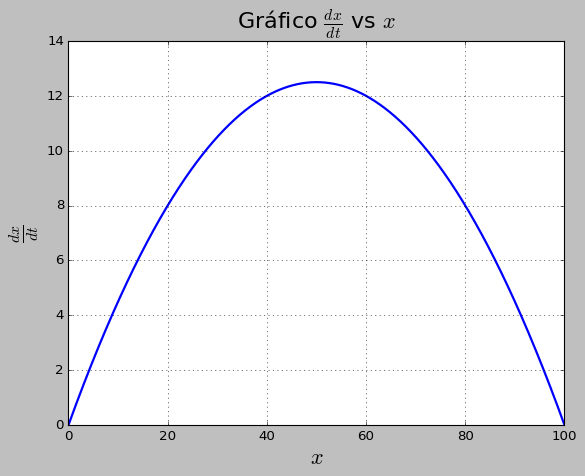

In [ ]:
x=np.arange(0, 100, 0.001)
r=0.5
k=100
dxdt= r*x*(1-(x/k))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0.5
#Parametros para metodos de paroximación
h = 0.1
tini = 0
tfin = 20
x0 = 2

##Aproximación Metodo de Euler
t1,x1 = euler( sistema_4, h, tini, tfin, x0, a)

##Aproximación Método Ruggen-Kutta
t2,x2 = rk4( sistema_4, h, tini, tfin, x0, a)

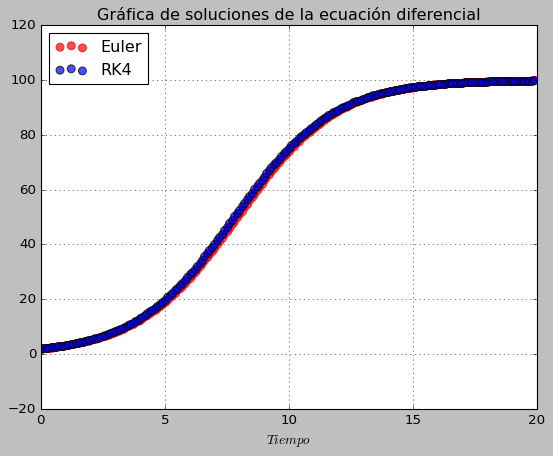

In [ ]:
plt.figure()
# gráfica de analítica:
#plt.plot(t, x, 'r', label = 'Analítica', linewidth = 2)
# gráfica de euler:
plt.scatter(t1, x1,color='r', label = 'Euler', s = 50, alpha=0.7)
plt.scatter(t2, x2, label = 'RK4', s = 50, alpha=0.7)
plt.title('Gráfica de soluciones de la ecuación diferencial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show()

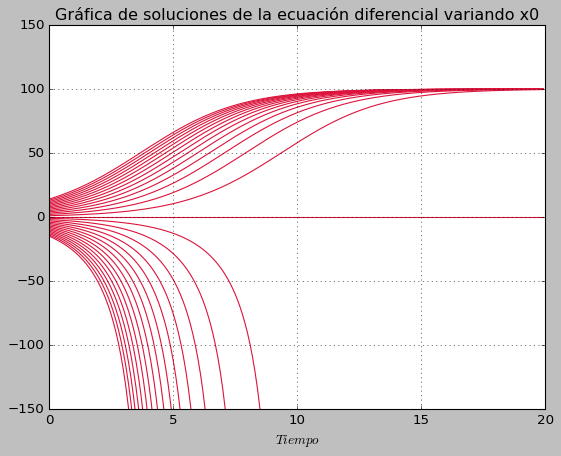

In [ ]:
for i in range(-15,15,1):
    x0=i
    t1,x1 = euler( sistema_4, h, tini, tfin, x0, a )
    plt.plot( t1, x1, c = 'crimson')
plt.title('Gráfica de soluciones de la ecuación diferencial variando x0')
plt.xlim([0, tfin])
plt.ylim([-150, 150])
plt.xlabel(r'$Tiempo$')
plt.grid()
#plt.legend(loc = 'best')
plt.show()

Como se puede observar un punto fijo tiene al valor de $K$ y es estable, el otro punto fijo es 0 y es inestable

#Ejercicios Strogatz

## Ejercicio 2.2.1

\begin{equation}
 \frac{dx}{dt}=4x^{2}-16
 \end{equation} 

In [ ]:
def sistema_5(t, x,a):
    x_dot = 4*pow(x,2)-16
    return x_dot

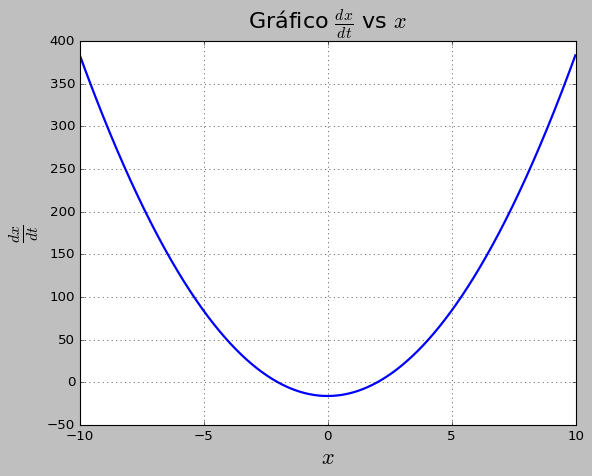

In [ ]:
x=np.arange(-10, 10, 0.01)

dxdt= 4*pow(x,2)-16
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = 0
tfin = 1
x0 = 0

t1,x1 = euler( sistema_5, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_5, h, tini, tfin, x0,a)

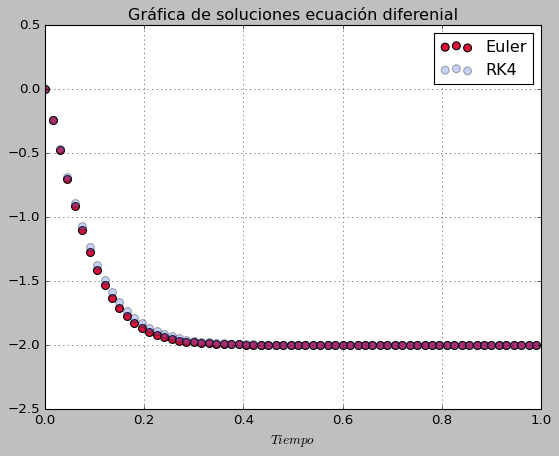

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([0, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


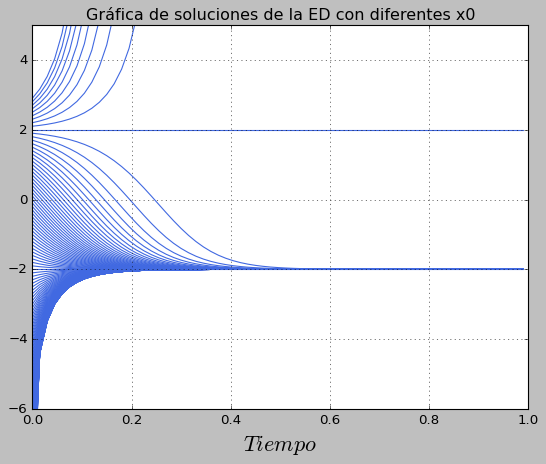

In [ ]:
a=np.arange(-10,3, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_5, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([0, tfin])
plt.ylim([-6, 5])
plt.xlabel(r'$Tiempo$', fontsize=20)
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones tienen dos puntos fijos: 

- Punto Estable en -2
- Punto Inestable en 2


## Ejercicio 2.2.2

\begin{equation}
 \frac{dx}{dt}=(1-x^{14})
 \end{equation} 

In [ ]:
def sistema_7(t, x,a):
    x_dot = 1-(pow(x,14))
    return x_dot

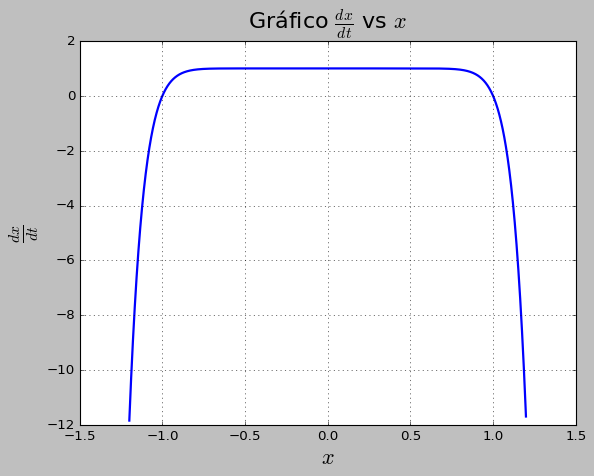

In [ ]:
x=np.arange(-1.2, 1.2, 0.001)
dxdt = (1-x**14)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = -1
tfin = 2
x0 = 0.2

t1,x1 = euler( sistema_7, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_7,h, tini, tfin, x0,a)

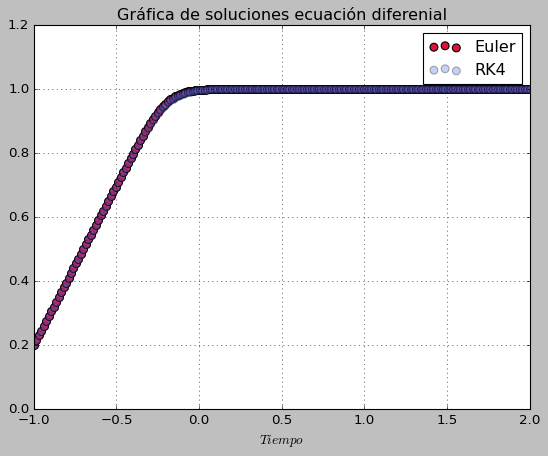

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([-1, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

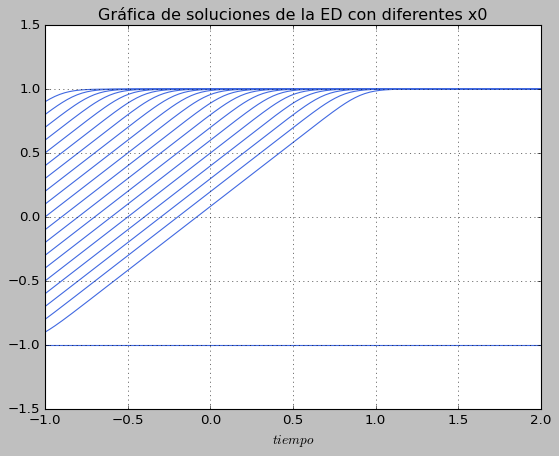

In [ ]:
a=np.arange(-1, 1, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_7, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([tini, tfin])
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones tienen dos puntos fijos: 

- Punto Estable en 1
- Punto Inestable en -1


## Ejercicio 2.2.3

\begin{equation}
 \frac{dx}{dt}=x-x^{3}
 \end{equation} 

In [ ]:
def sistema_8(t, x,a):
    x_dot = x-pow(x,3)
    return x_dot

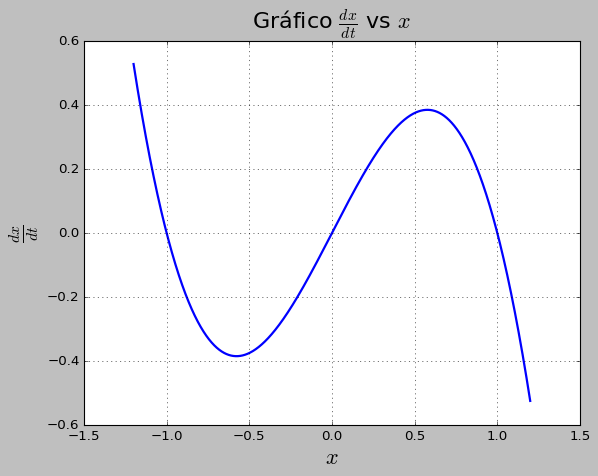

In [ ]:
x=np.arange(-1.2, 1.2, 0.001)
dxdt = x-pow(x,3)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = -1
tfin = 6
x0 = 0.2

t1,x1 = euler( sistema_8, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_8,h, tini, tfin, x0,a)

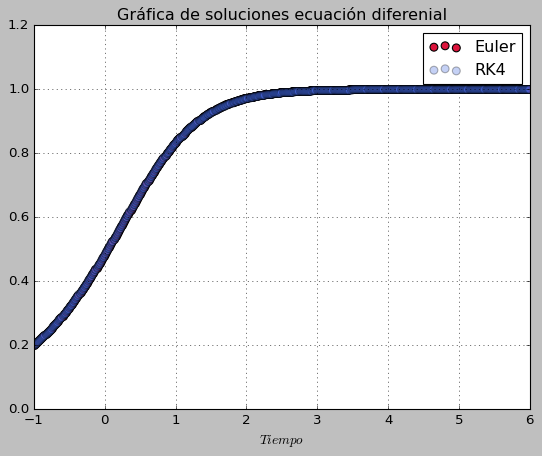

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([-1, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

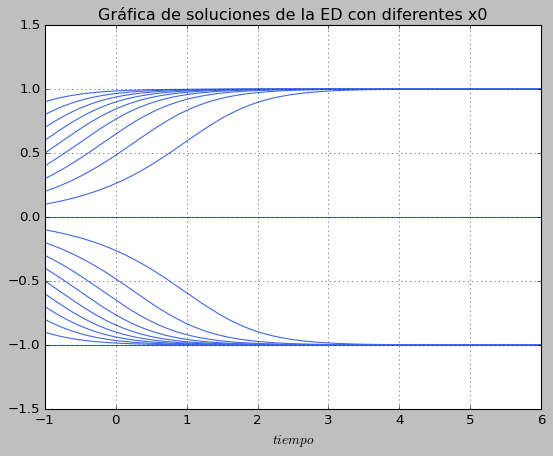

In [ ]:
a=np.arange(-1, 1, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_8, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([tini, tfin])
plt.ylim([-1.5, 1.5])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones tienen tres puntos fijos: 

- Puntos Estables en 1 y -1
- Punto Inestable en 0


## Ejercicio 2.2.4

\begin{equation}
 \frac{dx}{dt}=e^{-x}sin(x) 
 \end{equation} 

In [ ]:
def sistema_9(t, x,a):
    x_dot = np.exp(-x)*np.sin(x)
    return x_dot

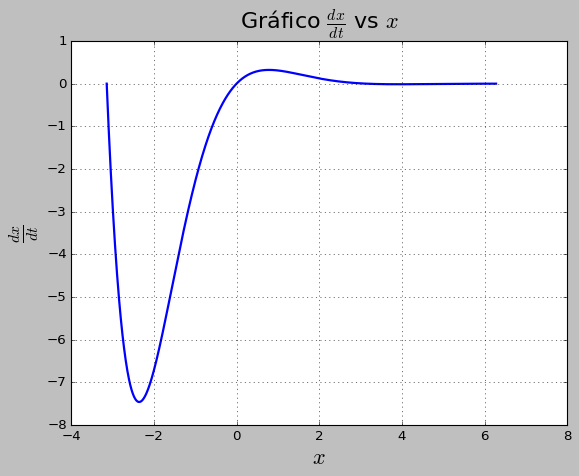

In [ ]:
x=np.arange(-np.pi,np.pi*2,.01)
dxdt = np.exp(-x)*np.sin(x)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = 0
tfin = 50
x0 = 0.2

t1,x1 = euler( sistema_9, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_9,h, tini, tfin, x0,a)

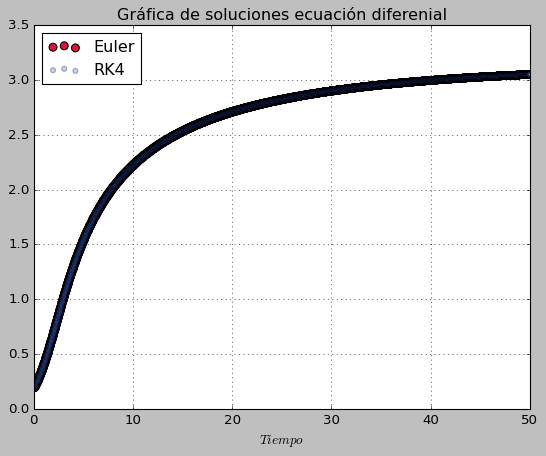

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 20,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([tini, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

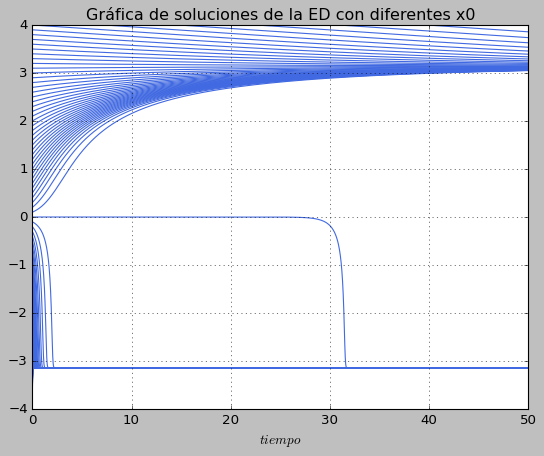

In [ ]:
a=np.arange(-5, 5, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_9, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([tini, tfin])
plt.ylim([-4, 4])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones tienen 2 puntos fijos: 

- Punto Estable en $(2k-1)\pi $
- Punto Inestable en $2k\pi$


## Ejercicio 2.2.5

\begin{equation}
 \frac{dx}{dt}=1+\frac{1}{2}cos(x)
 \end{equation} 

In [ ]:
def sistema_10(t, x,a):
    x_dot = 1+((1/2)*np.cos(x))
    return x_dot

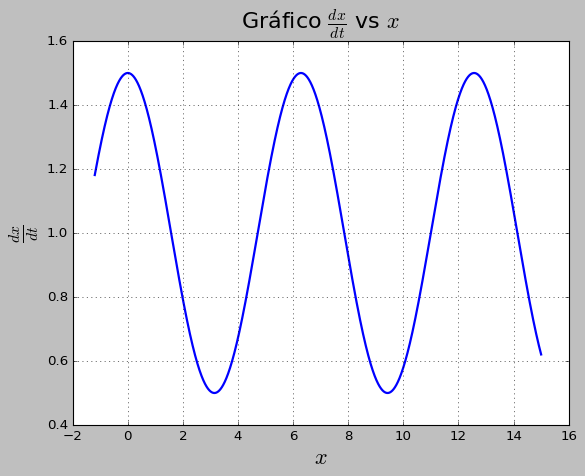

In [ ]:
x=np.arange(-1.2, 15, 0.001)
dxdt = 1+((1/2)*np.cos(x))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = -10
tfin = 10
x0 = 0.2

t1,x1 = euler( sistema_10, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_10,h, tini, tfin, x0,a)

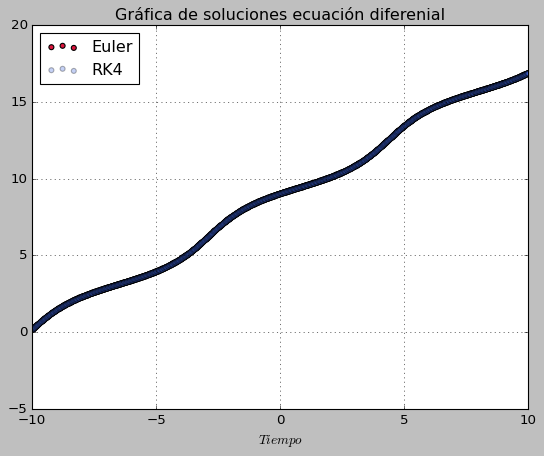

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 20)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 20,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([tini, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

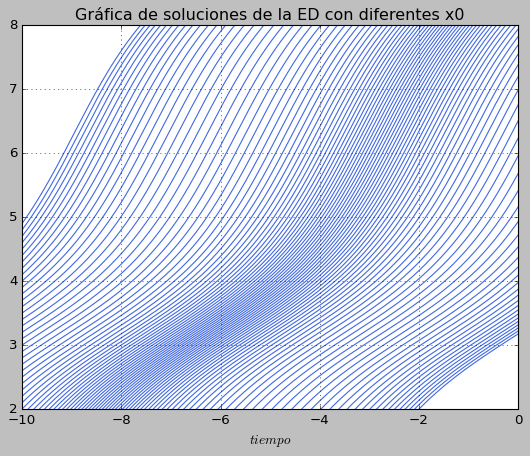

In [ ]:
a=np.arange(-5, 5, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_10, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([-10, 0])
plt.ylim([2, 8])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones no tienen puntos fijos


## Ejercicio 2.2.6

\begin{equation}
 \frac{dx}{dt}=1-2cos(x)
 \end{equation} 

In [ ]:
def sistema_11(t, x,a):
    x_dot = 1-2*(np.cos(x))
    return x_dot

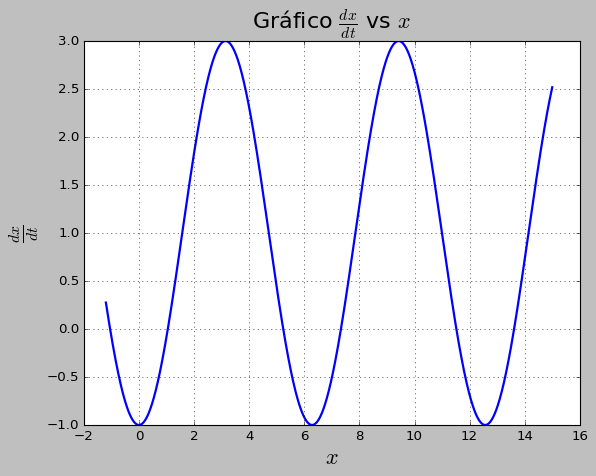

In [ ]:
x=np.arange(-1.2, 15, 0.001)
dxdt = 1-2*(np.cos(x))
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = -1
tfin = 10
x0 = 0.2

t1,x1 = euler( sistema_11, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_11,h, tini, tfin, x0,a)

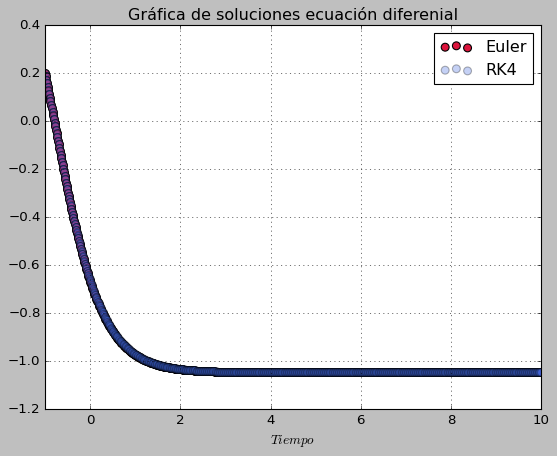

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([-1, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

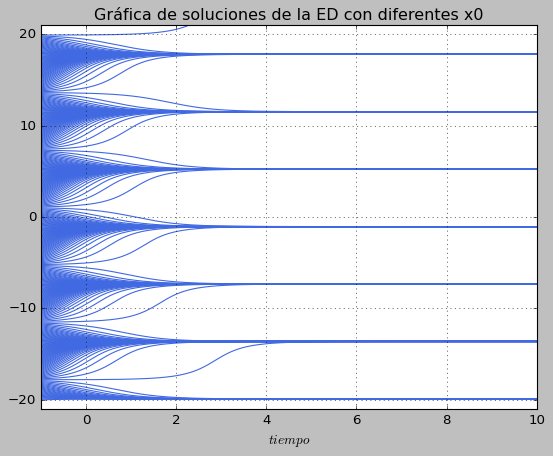

In [ ]:
a=np.arange(-20, 20, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_11, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([tini, tfin])
plt.ylim([-21, 21])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones tienen infinitos puntos fijos


## Ejercicio 2.2.7

\begin{equation}
 \frac{dx}{dt}=e^{x}-cos(x)
 \end{equation} 

In [ ]:
def sistema_12(t, x,a):
    x_dot = np.exp(x)-np.cos(x)
    return x_dot

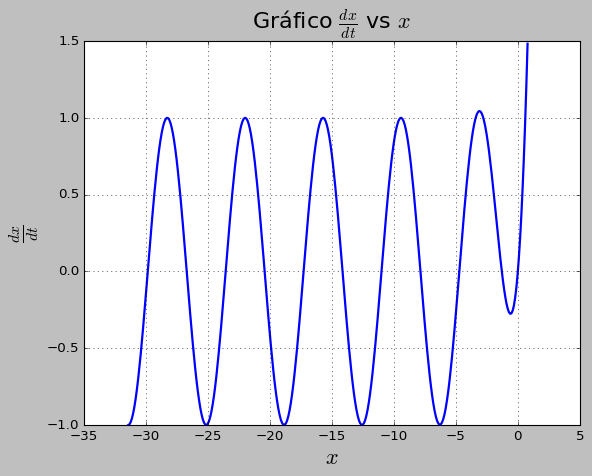

In [ ]:
x=np.arange(-10*np.pi,np.pi/4,.1)
dxdt = np.exp(x)-np.cos(x)
fig = plt.figure()
plt.plot( x, dxdt, linewidth = 2)
plt.title(r'Gráfico $\frac{dx}{dt}$ vs $x$', fontsize=20)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$\frac{dx}{dt}$', fontsize=20)
plt.grid()
plt.show()

In [ ]:
a=0
h = 0.015
tini = -1
tfin = 10
x0 = -5

t1,x1 = euler( sistema_12, h, tini, tfin, x0,a)
t2,x2 = rk4( sistema_12,h, tini, tfin, x0,a)

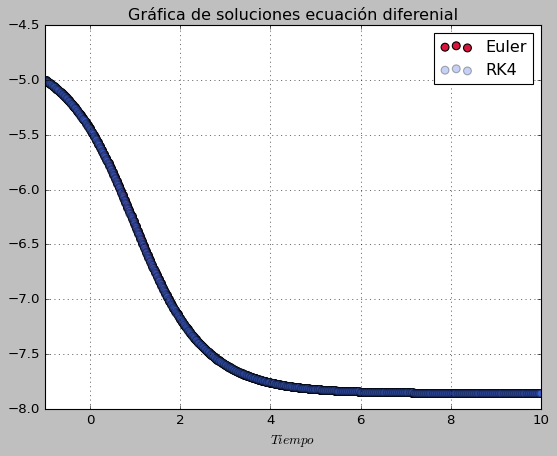

In [ ]:
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50,alpha=0.3)
plt.title('Gráfica de soluciones ecuación diferenial')
plt.xlim([-1, tfin])
plt.xlabel(r'$Tiempo$')
plt.grid()
plt.legend(loc='best')
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in cos
  


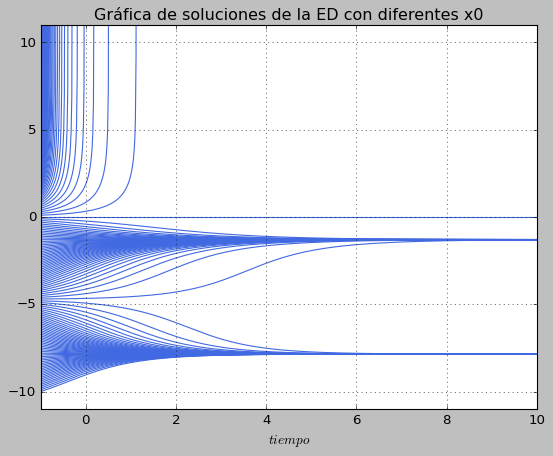

In [ ]:
a=np.arange(-10, 10, 0.1)
for i in a:
    x0=i
    t1,x1 = euler( sistema_12, h, tini, tfin, x0,a)
    #plt.plot( t3, x7, c = 'crimson')
    plt.plot( t1, x1, c = 'royalblue')
plt.xlim([tini, tfin])
plt.ylim([-11, 11])
plt.xlabel(r'$tiempo$')
plt.title('Gráfica de soluciones de la ED con diferentes x0')
plt.grid()
plt.show()

Las soluciones solo tienen puntos fijos estables para $x<0$
